In [3]:
from rl.q_learning import QNet, SVODataset, SVODatasetFromLog
import numpy as np
import matplotlib.pyplot as plt
import glob, pickle

In [13]:
parent_directory = '/home/nbuckman/mpc_results/02_23_nonrandom'
log_directories = glob.glob(parent_directory + '/*/*/')
parent_directory = '/home/nbuckman/mpc_results/02_24_nonrandom'

log_directories += glob.glob(parent_directory + '/*/*/')

params = {
    "log_directories": log_directories,
    "n_timesteps" : 161
}




In [14]:
dataset = SVODatasetFromLog(params["log_directories"], params["n_timesteps"])

In [15]:
total_V = [np.sum(sample['values']) for sample in dataset]
total_logs = [sample['log'] for sample in dataset]
total_svos = [sample['svos'] for sample in dataset]

In [16]:
len(dataset)

63

In [17]:
print("Stats")
print("Mean: %.3f"%np.mean(total_V))
print("Median: %.3f"%np.median(total_V))
print("Std: %.3f"%np.std(total_V))
print("Min: %.3f"%np.min(total_V))
print("Max: %.3f"%np.max(total_V))


Stats
Mean: -1844.007
Median: -1853.741
Std: 20.482
Min: -1855.884
Max: -1785.995


Text(0, 0.5, 'Frequency')

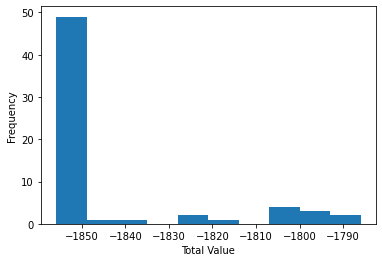

In [18]:
plt.hist(total_V)
plt.xlabel('Total Value')
plt.ylabel('Frequency')

In [23]:
svo_file = '/home/nbuckman/mpc-multiple-vehicles/rl/svo_arrays/opt2_23.p'
with open(svo_file, 'rb') as fp:
    svo_proto = pickle.load(fp)
    
    
svo_file = '/home/nbuckman/mpc-multiple-vehicles/rl/svo_arrays/opt_Feb19_10-13-31_nbuckman-desktop.p'
with open(svo_file, 'rb') as fp:
    svo_proto += pickle.load(fp)    
print(svo_proto)

[array([[0.],
       [0.],
       [0.],
       [0.]]), array([[0.78539816],
       [0.78539816],
       [0.78539816],
       [0.78539816]]), array([[1.57001132],
       [1.57001132],
       [1.57001132],
       [1.57001132]]), array([0.70860368, 1.30899694, 0.46076692, 1.46607657]), array([1.50098316, 1.53588974, 1.55334303, 0.16580628])]


In [24]:
svo_ids = []
for svo_list in total_svos:
    idx = np.argmin([np.linalg.norm(svo_list[1:] - svo_proto[i]) for i in range(len(svo_proto))])
    svo_ids += [idx]

Text(0, 0.5, 'Total Value')

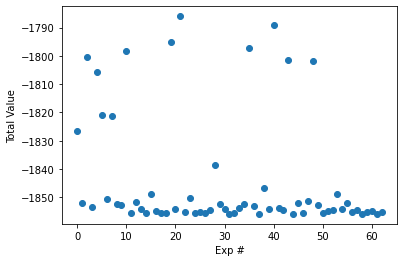

In [25]:
plt.plot(total_V, 'o')
plt.xlabel('Exp #')
plt.ylabel('Total Value')

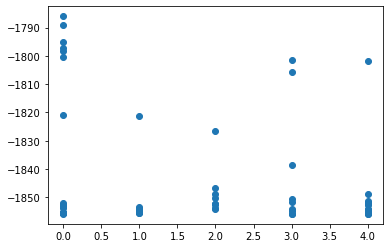

In [26]:
plt.plot(np.array(svo_ids), np.array(total_V), 'o')


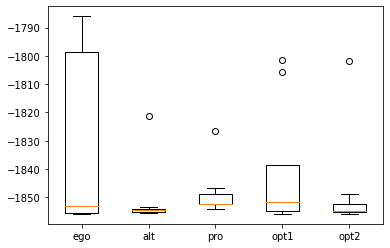

In [33]:
data = [[total_V[idx] for idx in range(len(total_V)) if svo_ids[idx]==0], 
       [total_V[idx] for idx in range(len(total_V)) if svo_ids[idx]==1],
       [total_V[idx] for idx in range(len(total_V)) if svo_ids[idx]==2],
        [total_V[idx] for idx in range(len(total_V)) if svo_ids[idx]==3],
        [total_V[idx] for idx in range(len(total_V)) if svo_ids[idx]==4],        
       ]
plt.boxplot(data)
plt.xticks([1,2,3,4,5], ['ego','alt','pro','opt1', 'opt2'])
plt.show()

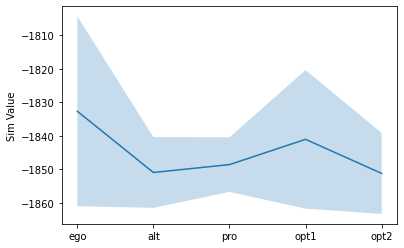

In [34]:
plt.plot(range(len(data)), [np.mean(data[idx]) for idx in range(len(data))])
plt.fill_between(range(len(data)), 
                 [np.mean(data[idx]) - np.std(data[idx]) for idx in range(len(data))], 
                 [np.mean(data[idx]) + np.std(data[idx]) for idx in range(len(data))],
                alpha=.25)

plt.ylabel('Sim Value')
plt.xticks([0,1,2,3, 4], ['ego','alt','pro','opt1', 'opt2'])
plt.show()

In [35]:
svo_proto[3]*180/np.pi

array([40.6, 75. , 26.4, 84. ])

In [36]:
svo_proto[4]*180/np.pi

array([86. , 88. , 89. ,  9.5])

In [37]:
min_idx = np.argmin(total_V)

In [38]:
min_svos = total_svos[min_idx]
min_log = total_logs[min_idx]

In [39]:
min_log

'/home/nbuckman/mpc_results/02_23_nonrandom/1d56-a579-20210223-002752/1d56-a579-20210223-002752_00003/'

In [40]:
[s*180/np.pi for s in min_svos]

[84.0, 40.60000000000001, 75.00000000000001, 26.4, 84.0]

In [41]:
total_V[min_idx]

-1855.8840417613117

## Closest to Q-optimal

In [42]:
theta_optimal_deg = np.array([90, 14, 1.5, 64])
theta_optimal = np.pi / 180 * theta_optimal_deg

# SVO vs. Value

In [43]:
total_svos = np.array(total_svos)
total_V = np.array(total_V)

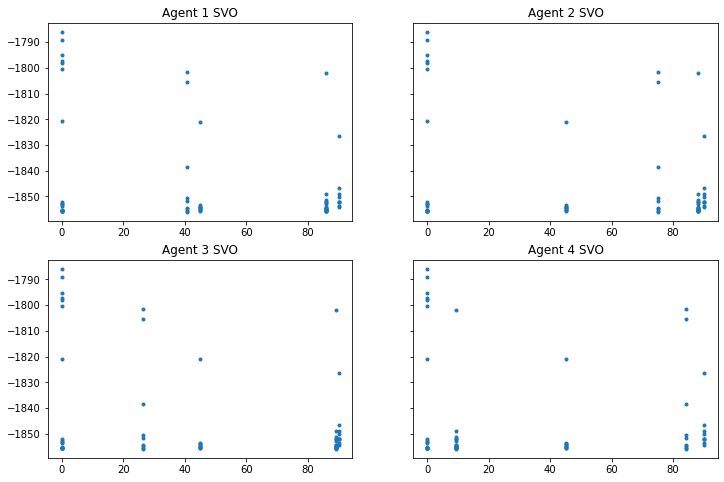

In [44]:
fig, axs = plt.subplots(2,2, figsize=(12,8), sharey=True)
axs[0,0].plot(180/np.pi * total_svos[:,1], total_V, '.')
axs[0,0].set_title('Agent 1 SVO')
axs[0,1].plot(180/np.pi * total_svos[:,2], total_V, '.')
axs[0,1].set_title('Agent 2 SVO')

axs[1,0].plot(180/np.pi * total_svos[:,3], total_V, '.')
axs[1,0].set_title('Agent 3 SVO')
axs[1,1].plot(180/np.pi * total_svos[:,4], total_V, '.')
axs[1,1].set_title('Agent 4 SVO')

# plt.xlabel('SVO [deg]')
# plt.ylabel('Value')
plt.show()